In [1]:
# import the require librairies
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
# load the merged dataset

# Load files
customers = pd.read_csv('../data/raw/DS_Case_Study1_data/customers.csv')
accounts = pd.read_csv('../data/raw/DS_Case_Study1_data/accounts.csv')
transactions = pd.read_csv('../data/raw/DS_Case_Study1_data/transactions.csv')
interactions = pd.read_csv('../data/raw/DS_Case_Study1_data/interactions.csv')

# Merge
merged = customers.merge(accounts, on='customer_id', how='left') \
                  .merge(transactions, on='account_id', how='left') \
                  .merge(interactions, on='customer_id', how='left')


In [5]:
# preview the merged dataset
merged.head()

,customer_id,age,income_bracket,region,cust_creation_date,is_active,account_id,account_type,status,open_date,close_date,transaction_id,transaction_date,transaction_type,amount,interaction_id,interaction_date,interaction_type
0,1,52,Medium,East,07/10/2021,True,1,Checking,Active,2021-06-15,NaN,3155.0,2025-05-11,Debit,4.49,378.0,2025-04-23,Technical Support
1,1,52,Medium,East,07/10/2021,True,1,Checking,Active,2021-06-15,NaN,3155.0,2025-05-11,Debit,4.49,663.0,2025-06-14,Service Inquiry
2,1,52,Medium,East,07/10/2021,True,1,Checking,Active,2021-06-15,NaN,3155.0,2025-05-11,Debit,4.49,871.0,2025-09-27,Product Inquiry
3,1,52,Medium,East,07/10/2021,True,1,Checking,Active,2021-06-15,NaN,7258.0,2025-02-12,Debit,10.53,378.0,2025-04-23,Technical Support
4,1,52,Medium,East,07/10/2021,True,1,Checking,Active,2021-06-15,NaN,7258.0,2025-02-12,Debit,10.53,663.0,2025-06-14,Service Inquiry


In [6]:
merged.columns

Index(['customer_id', 'age', 'income_bracket', 'region', 'cust_creation_date',
       'is_active', 'account_id', 'account_type', 'status', 'open_date',
       'close_date', 'transaction_id', 'transaction_date', 'transaction_type',
       'amount', 'interaction_id', 'interaction_date', 'interaction_type'],
      dtype='object')

In [7]:
merged.shape

(400436, 18)

In [8]:
merged.info() # checking 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400436 entries, 0 to 400435
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         400436 non-null  int64  
 1   age                 400436 non-null  int64  
 2   income_bracket      400436 non-null  object 
 3   region              400436 non-null  object 
 4   cust_creation_date  400436 non-null  object 
 5   is_active           400436 non-null  bool   
 6   account_id          400436 non-null  int64  
 7   account_type        400436 non-null  object 
 8   status              400436 non-null  object 
 9   open_date           400436 non-null  object 
 10  close_date          965 non-null     object 
 11  transaction_id      399471 non-null  float64
 12  transaction_date    399471 non-null  object 
 13  transaction_type    399471 non-null  object 
 14  amount              399471 non-null  float64
 15  interaction_id      398645 non-nul

In [9]:
# checking for missing values
merged.isnull().sum()

customer_id                0
age                        0
income_bracket             0
region                     0
cust_creation_date         0
is_active                  0
account_id                 0
account_type               0
status                     0
open_date                  0
close_date            399471
transaction_id           965
transaction_date         965
transaction_type         965
amount                   965
interaction_id          1791
interaction_date        1791
interaction_type        1791
dtype: int64

In [ ]:
# checking for duplicates
merged.duplicated().sum() 

np.int64(0)

In [13]:
# carryin eda on the features
df = merged.copy()

In [14]:
# Convert date columns to datetime
date_cols = ["cust_creation_date", "open_date", "close_date", "transaction_date", "interaction_date"]
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [15]:
df.dtypes

customer_id                    int64
age                            int64
income_bracket                object
region                        object
cust_creation_date    datetime64[ns]
is_active                       bool
account_id                     int64
account_type                  object
status                        object
open_date             datetime64[ns]
close_date            datetime64[ns]
transaction_id               float64
transaction_date      datetime64[ns]
transaction_type              object
amount                       float64
interaction_id               float64
interaction_date      datetime64[ns]
interaction_type              object
dtype: object

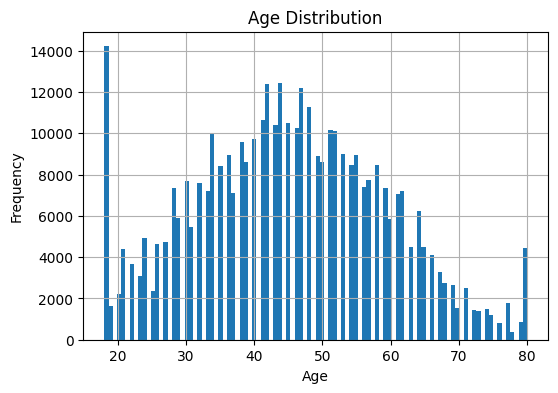

In [25]:
# ---------- Plot 1: Age Distribution ----------
plt.figure(figsize=(6,4))
df['age'].dropna().astype(int).hist(bins=100)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Age Distribution

* Customers appear evenly spread across the age groups
* No extreme age outliers
* Most customers fall within normal banking ages (20–60) and few above 60 -80 range

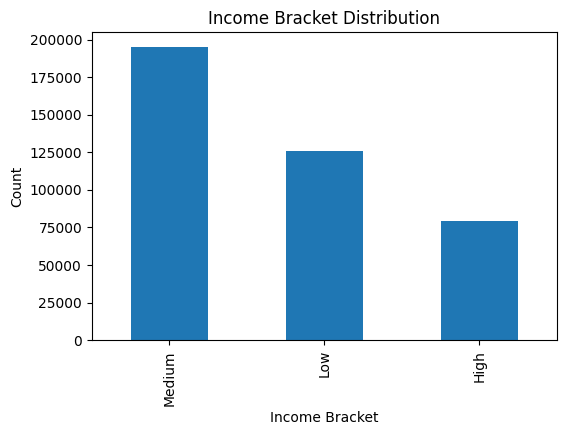

In [17]:
# ---------- Plot 2: Income Bracket Counts ----------
plt.figure(figsize=(6,4))
df['income_bracket'].value_counts().plot(kind='bar')
plt.title("Income Bracket Distribution")
plt.xlabel("Income Bracket")
plt.ylabel("Count")
plt.show()

Income Bracket Distribution

* The dataset has a well-defined distribution across income groups
* medium income brackets dominate


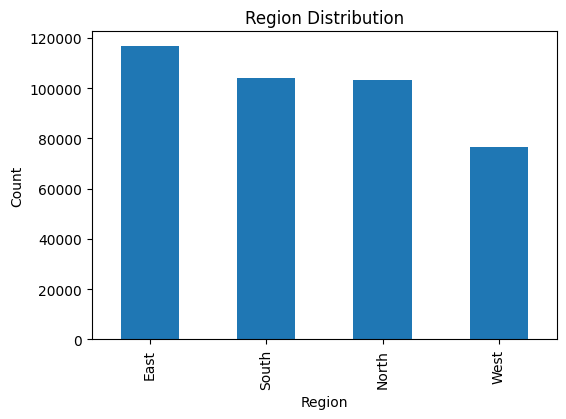

In [18]:
# ---------- Plot 3: Region Distribution ----------
plt.figure(figsize=(6,4))
df['region'].value_counts().plot(kind='bar')
plt.title("Region Distribution")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

Region Distribution

* The customer base is regionally concentrated
* Some regions significantly outweigh others

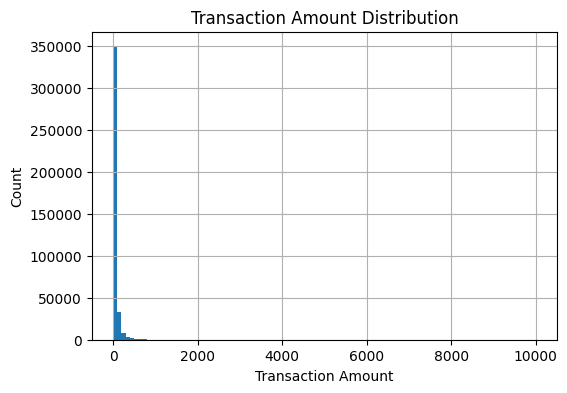

In [20]:
# ---------- Plot 4: Transaction Amount Distribution ----------
plt.figure(figsize=(6,4))
df['amount'].dropna().hist(bins=100)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()

4. Transaction Amount Distribution

* Transaction amounts are positively skewed (many small transactions, few large ones) - we will need to carry out log  transformation on this feature

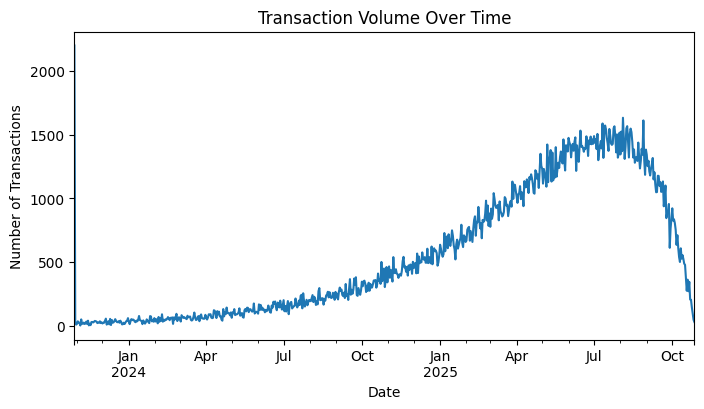

In [21]:
# ---------- Plot 5: Transactions Over Time ----------
plt.figure(figsize=(8,4))
df['transaction_date'].dropna().value_counts().sort_index().plot()
plt.title("Transaction Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.show()

Transactions Over Time

* Transaction volume fluctuates over time
* Visible seasonality and spikes
* Graudally increasing then downloard later part of oct 2025

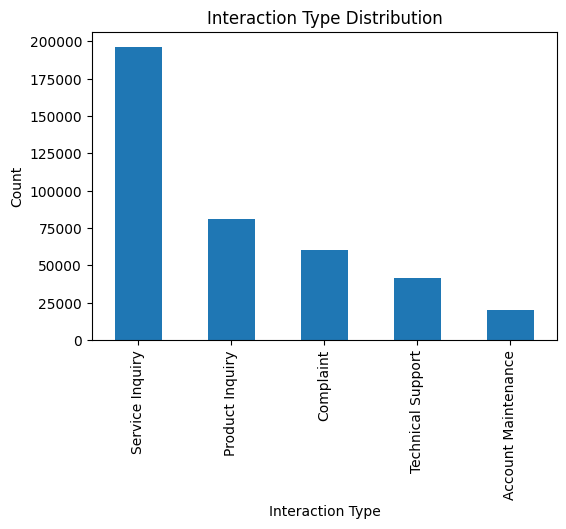

In [22]:
# ---------- Plot 6: Interaction Type Counts ----------
plt.figure(figsize=(6,4))
df['interaction_type'].value_counts().plot(kind='bar')
plt.title("Interaction Type Distribution")
plt.xlabel("Interaction Type")
plt.ylabel("Count")
plt.show()

Interaction Type Distribution

* Most interactions fall into Service and Product inquiry


## Part A : 
Task 1 - creating the target within the past 6 month of those that close thier account

In [26]:
# Load accounts and customers
accounts = pd.read_csv('../data/raw/DS_Case_Study1_data/accounts.csv')
customers = pd.read_csv('../data/raw/DS_Case_Study1_data/customers.csv')

# Convert dates
accounts['close_date'] = pd.to_datetime(accounts['close_date'], errors='coerce')

# Define 6-month window
start = pd.to_datetime("2025-04-28")
end   = pd.to_datetime("2025-10-28")

In [28]:
# Compute churn per customer
status = accounts.groupby("customer_id").agg(
    open_accounts = ("close_date", lambda x: x.isna().sum()),
    last_close_date = ("close_date", "max")
).reset_index()

status["has_churn"] = status.apply(
    lambda r: 1 if (r.open_accounts == 0 and r.last_close_date >= start and r.last_close_date <= end)
    else 0,
    axis=1
)


In [29]:

status.head(10)

,customer_id,open_accounts,last_close_date,has_churn
0,1,2,NaT,0
1,2,1,2025-08-29,0
2,3,2,NaT,0
3,4,2,NaT,0
4,5,2,NaT,0
5,6,4,NaT,0
6,7,2,NaT,0
7,8,2,NaT,0
8,9,1,NaT,0
9,10,0,2024-09-17,0


In [30]:
status.tail(10)

,customer_id,open_accounts,last_close_date,has_churn
1990,1991,3,NaT,0
1991,1992,2,NaT,0
1992,1993,2,NaT,0
1993,1994,3,NaT,0
1994,1995,2,NaT,0
1995,1996,3,NaT,0
1996,1997,1,NaT,0
1997,1998,0,2022-11-05,0
1998,1999,1,NaT,0
1999,2000,2,NaT,0


In [33]:
# chekk churn rate
churn_rate = status['has_churn'].mean()
churn_rate
#print(f"Churn Rate: {churn_rate:.2%}")

np.float64(0.0015)

In [32]:
# get the value counts of churn
status['has_churn'].value_counts()

has_churn
0    1997
1       3
Name: count, dtype: int64

In [34]:
# Merge churn label back into merged dataset
merged = merged.merge(status[["customer_id", "has_churn"]], on="customer_id", how="left")

In [41]:
merged.head()

,customer_id,age,income_bracket,region,cust_creation_date,is_active,account_id,account_type,status,open_date,close_date,transaction_id,transaction_date,transaction_type,amount,interaction_id,interaction_date,interaction_type,has_churn
0,1,52,Medium,East,07/10/2021,True,1,Checking,Active,2021-06-15,NaN,3155.0,2025-05-11,Debit,4.49,378.0,2025-04-23,Technical Support,0
1,1,52,Medium,East,07/10/2021,True,1,Checking,Active,2021-06-15,NaN,3155.0,2025-05-11,Debit,4.49,663.0,2025-06-14,Service Inquiry,0
2,1,52,Medium,East,07/10/2021,True,1,Checking,Active,2021-06-15,NaN,3155.0,2025-05-11,Debit,4.49,871.0,2025-09-27,Product Inquiry,0
3,1,52,Medium,East,07/10/2021,True,1,Checking,Active,2021-06-15,NaN,7258.0,2025-02-12,Debit,10.53,378.0,2025-04-23,Technical Support,0
4,1,52,Medium,East,07/10/2021,True,1,Checking,Active,2021-06-15,NaN,7258.0,2025-02-12,Debit,10.53,663.0,2025-06-14,Service Inquiry,0


In [42]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400436 entries, 0 to 400435
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         400436 non-null  int64  
 1   age                 400436 non-null  int64  
 2   income_bracket      400436 non-null  object 
 3   region              400436 non-null  object 
 4   cust_creation_date  400436 non-null  object 
 5   is_active           400436 non-null  bool   
 6   account_id          400436 non-null  int64  
 7   account_type        400436 non-null  object 
 8   status              400436 non-null  object 
 9   open_date           400436 non-null  object 
 10  close_date          965 non-null     object 
 11  transaction_id      399471 non-null  float64
 12  transaction_date    399471 non-null  object 
 13  transaction_type    399471 non-null  object 
 14  amount              399471 non-null  float64
 15  interaction_id      398645 non-nul

In [36]:
df = merged.copy()

In [37]:
df.account_type.nunique()

5

In [ ]:
df.describe(include='object') # summary statistics for categorical features

,income_bracket,region,cust_creation_date,account_type,status,open_date,close_date,transaction_date,transaction_type,interaction_date,interaction_type
count,400436,400436,400436,400436,400436,400436,965,399471,399471,398645,398645
unique,3,4,1230,5,2,1619,214,730,4,312,5
top,Medium,East,31/07/2024,Checking,Active,2023-05-07,2025-03-11,2023-10-29,Debit,2025-10-22,Service Inquiry
freq,195102,116738,1586,189660,399471,1273,17,2200,181218,7317,196536


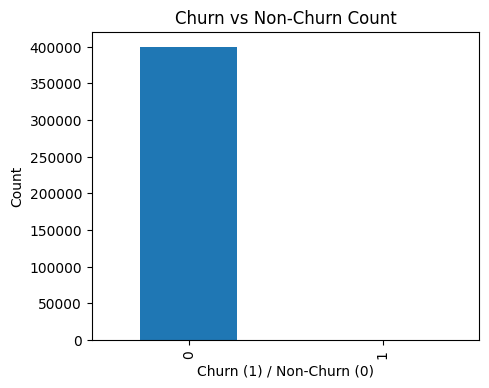

In [39]:
# EDA: Churn vs Non-Churn
# --------------------

# Plot 1: Churn count
plt.figure(figsize=(5,4))
merged['has_churn'].value_counts().plot(kind='bar')
plt.title("Churn vs Non-Churn Count")
plt.xlabel("Churn (1) / Non-Churn (0)")
plt.ylabel("Count")
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400436 entries, 0 to 400435
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         400436 non-null  int64  
 1   age                 400436 non-null  int64  
 2   income_bracket      400436 non-null  object 
 3   region              400436 non-null  object 
 4   cust_creation_date  400436 non-null  object 
 5   is_active           400436 non-null  bool   
 6   account_id          400436 non-null  int64  
 7   account_type        400436 non-null  object 
 8   status              400436 non-null  object 
 9   open_date           400436 non-null  object 
 10  close_date          965 non-null     object 
 11  transaction_id      399471 non-null  float64
 12  transaction_date    399471 non-null  object 
 13  transaction_type    399471 non-null  object 
 14  amount              399471 non-null  float64
 15  interaction_id      398645 non-nul

In [ ]:
# Load accounts file
accounts = pd.read_csv('../data/raw/DS_Case_Study1_data/accounts.csv')

# Convert close_date to datetime
accounts['close_date'] = pd.to_datetime(accounts['close_date'], errors='coerce')

# Group by customer and count open accounts
grouped = accounts.groupby("customer_id")['close_date'].apply(lambda x: x.isna().sum())

# Customers with ALL accounts closed (open_accounts == 0)
count_all_closed = (grouped == 0).sum()

count_all_closed


np.int64(38)

In [47]:
df.transaction_type.value_counts()

transaction_type
Debit       181218
Credit      147775
Transfer     50805
Payment      19673
Name: count, dtype: int64

In [48]:
df.account_type.value_counts()

account_type
Checking         189660
Savings          152244
Money Market      24256
Gold Checking     23531
CD                10745
Name: count, dtype: int64

In [51]:
# filter for Gold Checking accounts with churn == 1
gold_checking = df[(df['account_type'] == 'Gold Checking') & (df['has_churn'] == 1)]
#gold_checking = df[df['account_type'] == 'Gold Checking']

In [52]:
gold_checking.head()

,customer_id,age,income_bracket,region,cust_creation_date,is_active,account_id,account_type,status,open_date,close_date,transaction_id,transaction_date,transaction_type,amount,interaction_id,interaction_date,interaction_type,has_churn


In [53]:
accounts['close_date'].min(), accounts['close_date'].max()


(Timestamp('2021-01-29 00:00:00'), Timestamp('2025-10-27 00:00:00'))